Dataset shape: (569, 30)
Target distribution:
target
1    357
0    212
Name: count, dtype: int64

Top features based on Mutual Information scores:
                 Feature  MI Score
22       worst perimeter  0.471842
23            worst area  0.464313
20          worst radius  0.451230
7    mean concave points  0.438806
27  worst concave points  0.436255
2         mean perimeter  0.402361
6         mean concavity  0.375447
0            mean radius  0.362276
3              mean area  0.360023
13            area error  0.340759


<ipython-input-3-2c650d9467aa>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MI Score', y='Feature', data=mi_df, palette='viridis')


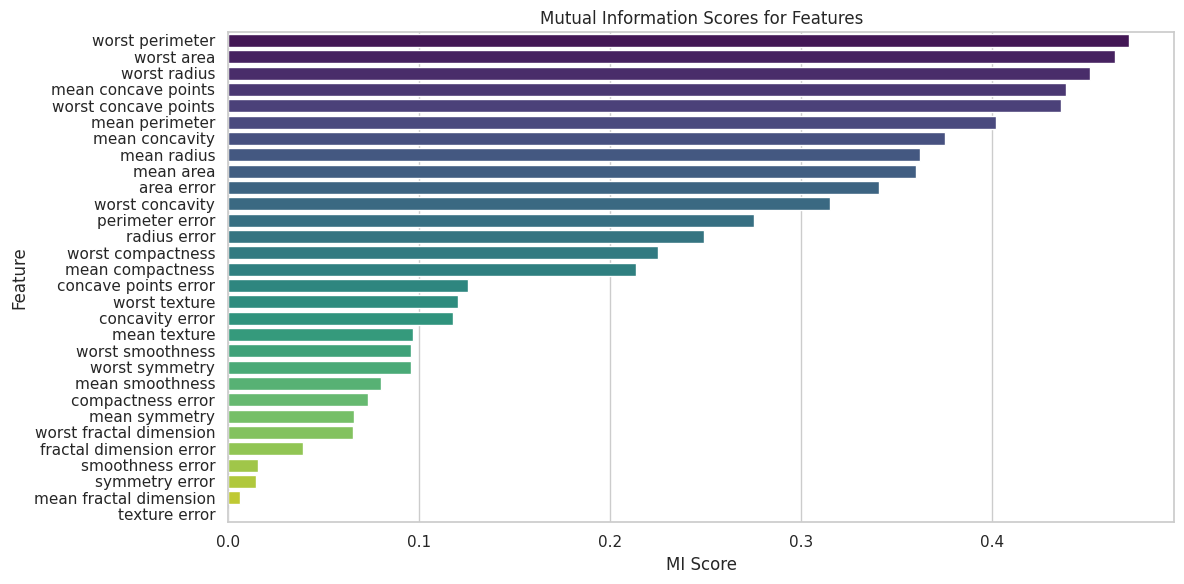


Top 10 selected features:
['mean radius', 'mean perimeter', 'mean area', 'mean concavity', 'mean concave points', 'area error', 'worst radius', 'worst perimeter', 'worst area', 'worst concave points']

Model Accuracy with Top 10 Features: 0.9474


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Set plot style for better aesthetics
sns.set(style="whitegrid")

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

# Display the shape of the dataset
print(f"Dataset shape: {X.shape}")
print(f"Target distribution:\n{y.value_counts()}")

# Standardize the feature set
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Compute Mutual Information scores
mi_scores = mutual_info_classif(X_scaled, y, discrete_features=False, random_state=42)

# Create a DataFrame to hold feature names and their corresponding MI scores
mi_df = pd.DataFrame({
    'Feature': data.feature_names,
    'MI Score': mi_scores
}).sort_values(by='MI Score', ascending=False)

# Display the top features based on MI scores
print("\nTop features based on Mutual Information scores:")
print(mi_df.head(10))

# Visualize the MI scores
plt.figure(figsize=(12, 6))
sns.barplot(x='MI Score', y='Feature', data=mi_df, palette='viridis')
plt.title('Mutual Information Scores for Features')
plt.tight_layout()
plt.show()

# Select top k features based on MI scores
k = 10  # You can adjust this value as needed
selector = SelectKBest(score_func=mutual_info_classif, k=k)
X_selected = selector.fit_transform(X_scaled, y)

# Retrieve the names of the selected features
selected_features = X.columns[selector.get_support()]
print(f"\nTop {k} selected features:")
print(selected_features.tolist())

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy with Top {k} Features: {accuracy:.4f}")